# Pyspark operations on a json file

In [1]:
import findspark
findspark.init('C:\\Spark\\spark-3.0.0-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col, translate
spark = SparkSession.builder.appName("Manipulate_JSON").getOrCreate()
sc = spark.sparkContext
# the '4' in the argument. It denotes 4 cores to be used for this SparkContext object
# sc=SparkContext(master="local[4]")

path = "Data/tv-shows.json"
tvshowDF = spark.read.json(path)

# The inferred schema can be visualized using the printSchema() method
tvshowDF.printSchema()

root
 |-- _links: struct (nullable = true)
 |    |-- nextepisode: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- previousepisode: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- self: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |-- externals: struct (nullable = true)
 |    |-- imdb: string (nullable = true)
 |    |-- thetvdb: long (nullable = true)
 |    |-- tvrage: long (nullable = true)
 |-- genres: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- id: long (nullable = true)
 |-- image: struct (nullable = true)
 |    |-- medium: string (nullable = true)
 |    |-- original: string (nullable = true)
 |-- language: string (nullable = true)
 |-- name: string (nullable = true)
 |-- network: struct (nullable = true)
 |    |-- country: struct (nullable = true)
 |    |    |-- code: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- timez

## Print the schema

In [2]:
tvshowDF.show() #to show all data in data frame

+--------------------+--------------------+--------------------+---+--------------------+--------+------------------+--------------------+--------------------+----------+------+-------+--------------------+-------+--------------------+--------+----------+--------------------+----------+------+
|              _links|           externals|              genres| id|               image|language|              name|             network|        officialSite| premiered|rating|runtime|            schedule| status|             summary|    type|   updated|                 url|webChannel|weight|
+--------------------+--------------------+--------------------+---+--------------------+--------+------------------+--------------------+--------------------+----------+------+-------+--------------------+-------+--------------------+--------+----------+--------------------+----------+------+
|[, [http://api.tv...|[tt1553656, 26449...|[Drama, Science-F...|  1|[http://static.tv...| English|    Under the Dom

## Data Cleaning

### Find null vaules column wise in dataframe

In [3]:
tvshowDF.select([count(when(col(c).isNull(), c)).alias(c) for c in tvshowDF.columns]).show()
len(tvshowDF.columns)
#The code above check for the existence of null value for every columns and count its frequency and then display it in a tabulated format as below.

+------+---------+------+---+-----+--------+----+-------+------------+---------+------+-------+--------+------+-------+----+-------+---+----------+------+
|_links|externals|genres| id|image|language|name|network|officialSite|premiered|rating|runtime|schedule|status|summary|type|updated|url|webChannel|weight|
+------+---------+------+---+-----+--------+----+-------+------------+---------+------+-------+--------+------+-------+----+-------+---+----------+------+
|     0|        0|     0|  0|    0|       0|   0|      7|          74|        0|     0|      0|       0|     0|      0|   0|      0|  0|       230|     0|
+------+---------+------+---+-----+--------+----+-------+------------+---------+------+-------+--------+------+-------+----+-------+---+----------+------+



20

## drop columns which are not required

In [4]:

tvshowDF = tvshowDF.drop('webChannel')
tvshowDF = tvshowDF.drop('officialSite')

In [5]:
tvshowDF.select([count(when(col(c).isNull(), c)).alias(c) for c in tvshowDF.columns]).show()
len(tvshowDF.columns)

+------+---------+------+---+-----+--------+----+-------+---------+------+-------+--------+------+-------+----+-------+---+------+
|_links|externals|genres| id|image|language|name|network|premiered|rating|runtime|schedule|status|summary|type|updated|url|weight|
+------+---------+------+---+-----+--------+----+-------+---------+------+-------+--------+------+-------+----+-------+---+------+
|     0|        0|     0|  0|    0|       0|   0|      7|        0|     0|      0|       0|     0|      0|   0|      0|  0|     0|
+------+---------+------+---+-----+--------+----+-------+---------+------+-------+--------+------+-------+----+-------+---+------+



18

In [6]:
# drop rows with missing or null values
tvshowDF = tvshowDF.dropna(how='any')

 ## to get details of currently running or ended shows

In [7]:
tvshowDF.groupBy("status").count().show()

+-------+-----+
| status|count|
+-------+-----+
|Running|   58|
|  Ended|  175|
+-------+-----+



## fetching all shows with average rating more than 9

In [8]:
high_ratedshowDF=tvshowDF.filter(tvshowDF['rating.average']>9) 

In [9]:
high_ratedshowDF.show() # printing all shows with rating >9

+--------------------+--------------------+--------------------+---+--------------------+--------+---------------+--------------------+----------+------+-------+-----------------+-------+--------------------+---------+----------+--------------------+------+
|              _links|           externals|              genres| id|               image|language|           name|             network| premiered|rating|runtime|         schedule| status|             summary|     type|   updated|                 url|weight|
+--------------------+--------------------+--------------------+---+--------------------+--------+---------------+--------------------+----------+------+-------+-----------------+-------+--------------------+---------+----------+--------------------+------+
|[, [http://api.tv...|[tt0318871, 73752...|[Anime, Fantasy, ...| 27|[http://static.tv...|Japanese|        Berserk|[[JP, Japan, Asia...|1997-10-07| [9.2]|     25|    [[Tuesday], ]|  Ended|<p><b>Berserk </b...|Animation|15046769

In [10]:
high_ratedshowDF.count() # counting high rated shows

7

## listing name of all high rated shows

In [11]:
high_ratedshowDF.select('name').show() 


+---------------+
|           name|
+---------------+
|        Berserk|
|Game of Thrones|
|   Breaking Bad|
|       The Wire|
|        Firefly|
|  Stargate SG-1|
| Rick and Morty|
+---------------+



## creates a file in local machine of format parquet

In [12]:
high_ratedshowDF.select("name", "rating").write.save("NamesAndRatings.parquet", format="parquet")


Py4JJavaError: An error occurred while calling o253.save.
: org.apache.spark.SparkException: Job aborted.
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:226)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:178)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:108)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:106)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.doExecute(commands.scala:131)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:175)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:213)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:210)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:171)
	at org.apache.spark.sql.execution.QueryExecution.toRdd$lzycompute(QueryExecution.scala:122)
	at org.apache.spark.sql.execution.QueryExecution.toRdd(QueryExecution.scala:121)
	at org.apache.spark.sql.DataFrameWriter.$anonfun$runCommand$1(DataFrameWriter.scala:944)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:100)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:160)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:87)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:763)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:944)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:396)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:380)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:269)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 20.0 failed 1 times, most recent failure: Lost task 0.0 in stage 20.0 (TID 211, LAPTOP-RBJJRMS1, executor driver): java.io.IOException: (null) entry in command string: null chmod 0644 E:\Xpanxion\python\Pyspark\NamesAndRatings.parquet\_temporary\0\_temporary\attempt_20200709193550_0020_m_000000_211\part-00000-910b78dc-0c5a-42e3-8645-73022b191e46-c000.snappy.parquet
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:773)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:869)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:852)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:733)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:225)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:209)
	at org.apache.hadoop.fs.RawLocalFileSystem.createOutputStreamWithMode(RawLocalFileSystem.java:307)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:296)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:328)
	at org.apache.hadoop.fs.ChecksumFileSystem$ChecksumFSOutputSummer.<init>(ChecksumFileSystem.java:398)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:461)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:440)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:911)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:892)
	at org.apache.parquet.hadoop.util.HadoopOutputFile.create(HadoopOutputFile.java:74)
	at org.apache.parquet.hadoop.ParquetFileWriter.<init>(ParquetFileWriter.java:248)
	at org.apache.parquet.hadoop.ParquetOutputFormat.getRecordWriter(ParquetOutputFormat.java:390)
	at org.apache.parquet.hadoop.ParquetOutputFormat.getRecordWriter(ParquetOutputFormat.java:349)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetOutputWriter.<init>(ParquetOutputWriter.scala:37)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$$anon$1.newInstance(ParquetFileFormat.scala:150)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.newOutputWriter(FileFormatDataWriter.scala:126)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.<init>(FileFormatDataWriter.scala:111)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeTask(FileFormatWriter.scala:264)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.$anonfun$write$15(FileFormatWriter.scala:205)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:444)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:447)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2023)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:1972)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:1971)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1971)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:950)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:950)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:950)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2203)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2152)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2141)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:752)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2093)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:195)
	... 32 more
Caused by: java.io.IOException: (null) entry in command string: null chmod 0644 E:\Xpanxion\python\Pyspark\NamesAndRatings.parquet\_temporary\0\_temporary\attempt_20200709193550_0020_m_000000_211\part-00000-910b78dc-0c5a-42e3-8645-73022b191e46-c000.snappy.parquet
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:773)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:869)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:852)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:733)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:225)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:209)
	at org.apache.hadoop.fs.RawLocalFileSystem.createOutputStreamWithMode(RawLocalFileSystem.java:307)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:296)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:328)
	at org.apache.hadoop.fs.ChecksumFileSystem$ChecksumFSOutputSummer.<init>(ChecksumFileSystem.java:398)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:461)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:440)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:911)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:892)
	at org.apache.parquet.hadoop.util.HadoopOutputFile.create(HadoopOutputFile.java:74)
	at org.apache.parquet.hadoop.ParquetFileWriter.<init>(ParquetFileWriter.java:248)
	at org.apache.parquet.hadoop.ParquetOutputFormat.getRecordWriter(ParquetOutputFormat.java:390)
	at org.apache.parquet.hadoop.ParquetOutputFormat.getRecordWriter(ParquetOutputFormat.java:349)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetOutputWriter.<init>(ParquetOutputWriter.scala:37)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$$anon$1.newInstance(ParquetFileFormat.scala:150)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.newOutputWriter(FileFormatDataWriter.scala:126)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.<init>(FileFormatDataWriter.scala:111)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeTask(FileFormatWriter.scala:264)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.$anonfun$write$15(FileFormatWriter.scala:205)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:444)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:447)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more


In [222]:
df2 = spark.read.load("NamesAndRatings.parquet")
df2.show()

## performing sql queries directly on files

In [14]:
 
querydf = spark.sql("SELECT * FROM json.`Data/tv-shows.json` where rating.average>8.0 ")

In [15]:
querydf.show()

+--------------------+--------------------+--------------------+---+--------------------+--------+------------------+--------------------+--------------------+----------+------+-------+--------------------+-------+--------------------+---------+----------+--------------------+----------+------+
|              _links|           externals|              genres| id|               image|language|              name|             network|        officialSite| premiered|rating|runtime|            schedule| status|             summary|     type|   updated|                 url|webChannel|weight|
+--------------------+--------------------+--------------------+---+--------------------+--------+------------------+--------------------+--------------------+----------+------+-------+--------------------+-------+--------------------+---------+----------+--------------------+----------+------+
|[, [http://api.tv...|[tt1839578, 24874...|[Drama, Action, C...|  2|[http://static.tv...| English|Person of Inte

In [16]:
querydf.count() 

101

In [17]:
tvshowDF.count()

233

 ## groupby query based on networks in dataset

 ### Max
 ### Min
 ### Mean

In [18]:
tvshowDF.groupby('network.name').mean().show()

+--------------+------------------+------------------+--------------------+-----------------+
|          name|           avg(id)|      avg(runtime)|        avg(updated)|      avg(weight)|
+--------------+------------------+------------------+--------------------+-----------------+
|           NBC|127.74074074074075|53.333333333333336|1.5253129224074075E9|71.18518518518519|
|      Showtime|120.85714285714286| 46.42857142857143| 1.533269948642857E9|84.57142857142857|
|           CMT|              53.0|              60.0|       1.536402567E9|             92.0|
|           ITV|             242.0|              60.0|       1.504806814E9|              0.0|
|   BBC America|              37.0|              60.0|       1.535820437E9|             36.0|
|       Cinemax|             107.5|              60.0|      1.5233619865E9|             83.0|
|El Rey Network|             105.0|              60.0|       1.533639336E9|             87.0|
|Comedy Central|202.66666666666666|              30.0|1.5335

In [19]:
tvshowDF.groupby('network.name').max().show()

+--------------+-------+------------+------------+-----------+
|          name|max(id)|max(runtime)|max(updated)|max(weight)|
+--------------+-------+------------+------------+-----------+
|           NBC|    237|         120|  1536584006|         99|
|      Showtime|    161|          60|  1536575654|        100|
|           CMT|     53|          60|  1536402567|         92|
|           ITV|    242|          60|  1504806814|          0|
|   BBC America|     37|          60|  1535820437|         36|
|       Cinemax|    164|          60|  1526372513|         87|
|El Rey Network|    105|          60|  1533639336|         87|
|Comedy Central|    249|          30|  1534598404|         90|
|   WGN America|    185|          60|  1521566727|         80|
|     Disney XD|    117|          30|  1533639037|         89|
|      Lifetime|    201|          60|  1532897388|         87|
|          Syfy|    245|          60|  1536215230|         97|
|   Nickelodeon|    178|          30|  1535215074|     

In [20]:
tvshowDF.groupby('network.name').min().show()

+--------------+-------+------------+------------+-----------+
|          name|min(id)|min(runtime)|min(updated)|min(weight)|
+--------------+-------+------------+------------+-----------+
|           NBC|     10|          30|  1477162055|          0|
|      Showtime|      7|          30|  1514126563|         53|
|           CMT|     53|          60|  1536402567|         92|
|           ITV|    242|          60|  1504806814|          0|
|   BBC America|     37|          60|  1535820437|         36|
|       Cinemax|     51|          60|  1520351460|         79|
|El Rey Network|    105|          60|  1533639336|         87|
|Comedy Central|    112|          30|  1531338860|         21|
|   WGN America|    185|          60|  1521566727|         80|
|     Disney XD|    117|          30|  1533639037|         89|
|      Lifetime|     47|          60|  1518183491|         76|
|          Syfy|     34|          30|  1495228218|         21|
|   Nickelodeon|    178|          30|  1535215074|     

In [21]:
# find tv show with max runtime by aggregation function
tvshowDF.agg({'runtime':'max'}).show() 

+------------+
|max(runtime)|
+------------+
|         120|
+------------+



## Get the show with highest runtime

In [23]:
querydf = spark.sql("SELECT name FROM json.`Data/tv-shows.json` where runtime = 120 limit 1 ")

In [24]:
querydf.show()

+---------+
|     name|
+---------+
|The Voice|
+---------+



In [25]:
#Using group by and aggregate together
group_data = tvshowDF.groupby('name')
group_data.agg({'runtime':'max'}).show()

+--------------------+------------+
|                name|max(runtime)|
+--------------------+------------+
|              Crisis|          60|
|Battlestar Galactica|          60|
|The Daily Show wi...|          30|
|             Mulaney|          30|
|            Marry Me|          30|
|  Survivor's Remorse|          30|
| The Vampire Diaries|          60|
|            Hostages|          60|
|             Berserk|          25|
|            Cristela|          30|
|       Stargate SG-1|          60|
|CSI: Crime Scene ...|          60|
|       The Last Ship|          60|
|               Awake|          60|
|           The Voice|         120|
|             Believe|          60|
|           The River|          60|
|          Revolution|          60|
|                Glee|          60|
|        Chicago Fire|          60|
+--------------------+------------+
only showing top 20 rows



## get shows which premiered in a specific year

In [26]:
#get all shows aired in 2011
spark.sql("SELECT premiered FROM json.`Data/tv-shows.json` where premiered like '%2011%'").show()

+----------+
| premiered|
+----------+
|2011-09-22|
|2011-10-02|
|2011-09-21|
|2011-10-28|
|2011-10-05|
|2011-04-03|
|2011-10-11|
|2011-09-20|
|2011-04-26|
|2011-11-06|
|2011-04-17|
|2011-09-20|
|2011-06-19|
|2011-01-09|
|2011-10-23|
|2011-09-19|
|2011-01-09|
|2011-07-19|
|2011-01-09|
|2011-06-23|
+----------+
only showing top 20 rows



## get shows which have rating above 9 along with network name and plot the graph

In [27]:
querydf = spark.sql("SELECT network.name, count(name) from json.`Data/tv-shows.json` where rating.average>9.0 group by network.name")
querydf = querydf.dropna(how= 'any')
querydf.show()

+----------+-----------+
|      name|count(name)|
+----------+-----------+
|      Syfy|          1|
|       HBO|          2|
|       FOX|          1|
|       AMC|          1|
|       NTV|          1|
|Adult Swim|          1|
+----------+-----------+



In [28]:
import matplotlib.pyplot as plt
x = [row['name'] for row in querydf.collect()]
y = [row['count(name)'] for row in querydf.collect()]


In [29]:
x

['Syfy', 'HBO', 'FOX', 'AMC', 'NTV', 'Adult Swim']

No handles with labels found to put in legend.


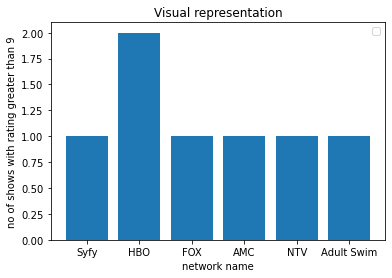

In [30]:
plt.bar(x, y)
plt.xlabel('network name')
plt.ylabel('no of shows with rating greater than 9')
plt.title('Visual representation')
plt.legend()
plt.show()